In [11]:
'''
Questions to be answered about this specific dataset
- Number of sales over the years and months
- Which genre is the most popular?
- Which publisher published most of the games?
- Which developer developed most of the games?
- Which series is the most popular?

'''

'\nQuestions to be answered about this specific dataset\n- Number of sales over the years and months\n- Which genre is the most popular ?\n- Which publisher published most of the games ?\n- Which developer developed most of the games ?\n- Which series is the most popular ?\n\n'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
games = pd.read_csv('Games.csv')
games.head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts


In [14]:
# Checking data types and if there is any null values
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [15]:
# Spliting the release date into month and year
games[['Month', 'Year']] = games['Release'].str.split('-', 1, expand=True)

m = {'Jan':'01', 'Feb':'02', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7',
    'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}

games['Month'] = games['Month'].map(m)

games['Month'] = games['Month'].astype(int)
games['Year'] = games['Year'].astype(int)

games.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,12,17
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,11,11
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,5,12
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,11,6
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,5,11


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
 7   Month      175 non-null    int32  
 8   Year       175 non-null    int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 11.1+ KB


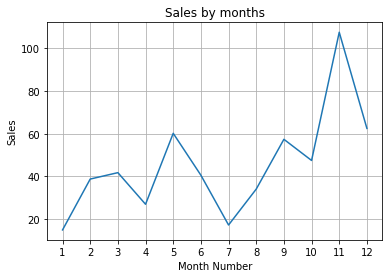

In [17]:
# Sales by Month

monthly_sales = games[['Sales', 'Month']].groupby('Month').sum('Sales')
monthly_sales['Month'] = monthly_sales.index

months = monthly_sales['Month']
sales = monthly_sales['Sales']

plt.plot(months, sales)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.title('Sales by months')
plt.grid()
plt.show()

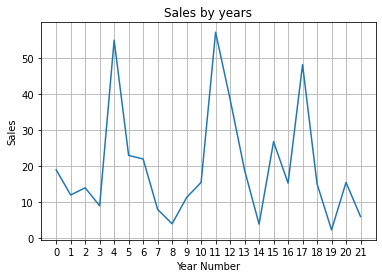

In [18]:
# Sales by Year

yearly_sales = games[['Year', 'Sales']].groupby('Year').sum('Sales')
yearly_sales['Year'] = yearly_sales.index

years_XXI = yearly_sales.loc[(yearly_sales['Year'] <= 70) & yearly_sales['Sales']]

years = years_XXI['Year']
sales = years_XXI['Sales']

plt.plot(years, sales)
plt.xticks(years)
plt.ylabel('Sales')
plt.xlabel('Year Number')
plt.title('Sales by years')
plt.grid()
plt.show()

In [21]:
# Investigating sales spikes
games_spikes = games.loc[games['Year'] == 17]
games_spikes

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,12,17
80,Stickfight: The Game,2.0,NaN,Sep-17,Fighting,Landfall Games,Landfall Games,9,17
94,Nier: Automata,1.2,Nier,Mar-17,"Action role-playing, hack and slash",PlatinumGames,Square Enix,3,17
112,Cuphead,1.0,NaN,Sep-17,Run and gun,StudioMDHR,StudioMDHR,9,17
117,Divinity: Original Sin II,1.0,Divinity,Sep-17,Role-playing game,Larian Studios,Larian Studios,9,17
131,Hollow Knight,1.0,NaN,Feb-17,Metroidvania,Team Cherry,Team Cherry,2,17


In [22]:
# Which genre is the most popular ?

gen_sal = games[['Sales', 'Genre']].groupby('Genre').sum('Sales')
gen_sal.sort_values('Sales', ascending = False).head(10)

,Sales
Genre,
Action role-playing,58.1
Real-time strategy,55.0
Battle royale,52.0
First-person shooter,46.0
"Sandbox, survival",33.0
Action-adventure,31.7
MMORPG,30.0
Construction and management simulation,25.8
Survival,25.0


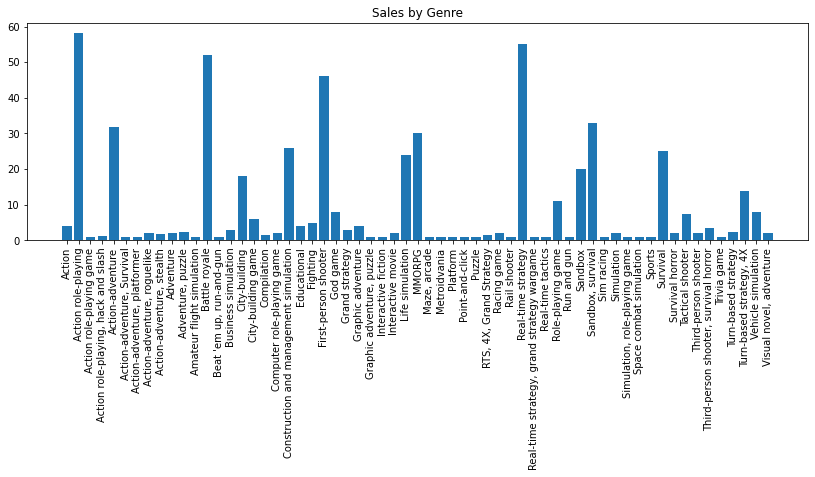

In [42]:
gen_sal['Genre'] = gen_sal.index

genre = gen_sal['Genre']
sales = gen_sal['Sales']

plt.figure(figsize=(14, 4))
plt.bar(genre, sales)
plt.xticks(rotation=90, size=10)
plt.title('Sales by Genre')
plt.show()

In [44]:
# - Which publisher published most of the games?

games['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [45]:
# - Which developer developed most of the games?

games['Developer'].value_counts()

Blizzard Entertainment             8
Maxis                              6
Paradox Development Studio         5
id Software                        4
Westwood Studios                   4
                                  ..
Kojima Productions                 1
Edmund McMillen & Florian Himsl    1
Landfall Games                     1
Keen Software House                1
Microsoft                          1
Name: Developer, Length: 109, dtype: int64

In [49]:
# - Which series is the most popular?

sal_ser = games[['Series', 'Sales']].dropna()
sal_ser.head(10)

,Series,Sales
1,Minecraft,33.0
2,Diablo,20.0
5,Warcraft,14.0
6,Half-Life,12.0
7,The Witcher,12.0
8,StarCraft,11.0
9,The Sims,11.0
11,RollerCoaster Tycoon,10.0
12,Half-Life,9.0
14,Civilization,8.0


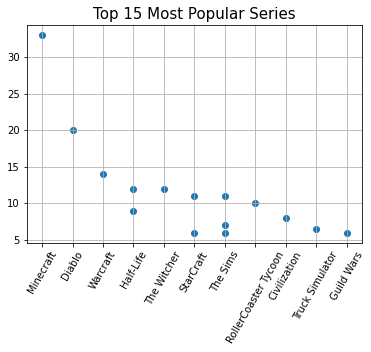

In [57]:
series = sal_ser['Series'].head(15)
sales = sal_ser['Sales'].head(15)

plt.scatter(series, sales)
plt.title('Top 15 Most Popular Series', size=15)
plt.xticks(rotation=60, size=10)
plt.grid()
plt.show()